IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yuxiang ZHANG & Antoine LECOMTE

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [3]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [4]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [5]:
newsgroups_df_neitoie = newsgroups_df.dropna(subset=['messages'])
stop_words_list = stop_words_df['stopword'].tolist()
newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))
newsgroups_df_neitoie

C:\Users\Antoine\AppData\Local\Temp\ipykernel_3904\959504396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsgroups_df_neitoie['les_mots'] = newsgroups_df_neitoie['messages'].apply(lambda x: ut.text2vect(x, stop_words_list))


,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[old, jasmine, drive, cannot, use, new, system..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, cpu, clone, motherboard, tried, mo..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, space, points, specif..."


In [6]:
index_mots = sorted(set(word for mots in newsgroups_df_neitoie['les_mots'] for word in mots))

print("Nombre de mots trouvés: ", len(index_mots))
print("Les 10 premiers :", index_mots[0:10]) 

# pour contrôler:
for i in range(30,len(index_mots),100):
    print("\ten position ",i," --> ", index_mots[i])


Nombre de mots trouvés:  90850
Les 10 premiers : ["''a", "''achzq", "''afduqy", "''afg", "''ai", "''ai''q", "''al", "''bpl", "''bs", "''c"]
	en position  30  -->  'afdzqvg'al
	en position  130  -->  'i'
	en position  230  -->  'qp
	en position  330  -->  'wx
	en position  430  -->  aarskog
	en position  530  -->  abhorrence
	en position  630  -->  abridgement
	en position  730  -->  acadamy
	en position  830  -->  accom
	en position  930  -->  accusers
	en position  1030  -->  acknowledgment
	en position  1130  -->  activitiests
	en position  1230  -->  adda
	en position  1330  -->  aditives
	en position  1430  -->  ado
	en position  1530  -->  adventists
	en position  1630  -->  aerodynamics
	en position  1730  -->  afflicting
	en position  1830  -->  agabus
	en position  1930  -->  agonies
	en position  2030  -->  ahmad
	en position  2130  -->  aire
	en position  2230  -->  ajteel
	en position  2330  -->  alarm
	en position  2430  -->  aleuts
	en position  2530  -->  alive
	en positi

In [7]:
from scipy.sparse import csr_matrix

def bag_of_words_sparse_manual(texts_tokenized, vocab, mode="count"):
    """
    :param mode: valeurs possibles : 'count', 'binary', 'freq'
    """
    from scipy.sparse import csr_matrix
    vocab_index = {word: i for i, word in enumerate(vocab)}

    rows, cols, data = [], [], []

    for row_idx, tokens in enumerate(texts_tokenized):
        word_counts = {}
        for word in tokens:
            if word in vocab_index:
                col_idx = vocab_index[word]
                word_counts[col_idx] = word_counts.get(col_idx, 0) + 1

        total_words = sum(word_counts.values())

        for col_idx, count in word_counts.items():
            rows.append(row_idx)
            cols.append(col_idx)

            if mode == "count":
                value = count
            elif mode == "binary":
                value = 1
            elif mode == "freq":
                value = count / total_words
            else:
                raise ValueError("Mode non supporté : choisissez parmi 'count', 'binary', 'freq'")

            data.append(value)

    n_rows = len(texts_tokenized)
    n_cols = len(vocab)
    
    sparse_matrix = csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols), dtype=float)
    return sparse_matrix, vocab_index

In [8]:
import math
def bag_of_words_tfidf_manual(textes_tokenisés, vocabulaire):
    """
    :param textes_tokenisés: Liste de listes de mots (tokens)
    :param vocabulaire: liste des mots du vocabulaire
    :return: matrice creuse TF-IDF (csr_matrix), dictionnaire {mot: index}
    """
    vocab_index = {mot: i for i, mot in enumerate(vocabulaire)}
    N_docs = len(textes_tokenisés)  # Nombre de documents
    
    # 1. Calcul de la DF (Document Frequency)
    df_counts = np.zeros(len(vocabulaire))
    for tokens in textes_tokenisés:
        mots_uniques = set(tokens)
        for mot in mots_uniques:
            if mot in vocab_index:
                df_counts[vocab_index[mot]] += 1
    
    # Éviter la division par 0
    df_counts[df_counts == 0] = 1

    # 2. Construction de la matrice creuse TF-IDF
    lignes, colonnes, données = [], [], []

    for doc_idx, tokens in enumerate(textes_tokenisés):
        tf_counts = {}
        for mot in tokens:
            if mot in vocab_index:
                idx = vocab_index[mot]
                tf_counts[idx] = tf_counts.get(idx, 0) + 1

        total_mots = sum(tf_counts.values())

        for idx, tf in tf_counts.items():
            tf_val = tf / total_mots
            idf_val = math.log(N_docs / df_counts[idx])
            tfidf = tf_val * idf_val

            lignes.append(doc_idx)
            colonnes.append(idx)
            données.append(tfidf)

    mat = csr_matrix((données, (lignes, colonnes)), shape=(N_docs, len(vocabulaire)))
    return mat, vocab_index


In [9]:
# Appel de la fonction pour générer la matrice BoW
X_sparse, vec = bag_of_words_sparse_manual(newsgroups_df_neitoie['les_mots'], index_mots)

# Vérification de la forme de la matrice
print(X_sparse.shape)
print(type(X_sparse))

# Conversion en DataFrame pour affichage
df_bow = pd.DataFrame(X_sparse.toarray(), columns=index_mots)
df_bow

(18466, 90850)
<class 'scipy.sparse._csr.csr_matrix'>


,''a,''achzq,''afduqy,''afg,''ai,''ai''q,''al,''bpl,''bs,''c,...,zznkzz,zznp,zzq,zzrk,zzs,zzvsi,zzz's,zzzoh,zzzzzz,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
np.random.seed(42)  # Pour reproductibilité

# Pourcentage d'exemples de chaque classe à garder :
taux = 0.05  # 5%

# Déclaration des variables qui seront initialisées dans la boucle :
df_train = pd.DataFrame()  
df_test = pd.DataFrame()

les_targets = newsgroups_df_neitoie['target'].unique()

for l in les_targets:
    nb_total = newsgroups_df_neitoie['target'].value_counts()[l]  # Nombre total d'exemples pour la classe l
    nb_pris = int(nb_total * taux)  # Nombre d'exemples à prendre pour l'entraînement
    print(f"Nombre d'exemples du label {l} pris pour apprendre: {nb_pris}")

    # Récupération des indices des exemples de cette classe
    les_ids = newsgroups_df_neitoie[newsgroups_df_neitoie['target'] == l].index.to_list()
    
    # Mélanger les indices aléatoirement
    np.random.shuffle(les_ids)

    # Séparer les indices pour l'entraînement et le test
    ids_train = les_ids[:nb_pris]  # 5% pour l'entraînement
    ids_test = les_ids[nb_pris:]   # Le reste pour le test

    # Ajouter les données correspondantes aux DataFrames
    df_train = pd.concat([df_train, newsgroups_df_neitoie.loc[ids_train]], ignore_index=True)
    df_test = pd.concat([df_test, newsgroups_df_neitoie.loc[ids_test]], ignore_index=True)

# Résultat :
print(f"Dimension de df_train:\t{df_train.shape}")
print(f"Dimension de df_test:\t{df_test.shape}")

Nombre d'exemples du label 10 pris pour apprendre: 49
Nombre d'exemples du label 3 pris pour apprendre: 48
Nombre d'exemples du label 17 pris pour apprendre: 46
Nombre d'exemples du label 4 pris pour apprendre: 46
Nombre d'exemples du label 12 pris pour apprendre: 48
Nombre d'exemples du label 19 pris pour apprendre: 30
Nombre d'exemples du label 11 pris pour apprendre: 48
Nombre d'exemples du label 13 pris pour apprendre: 48
Nombre d'exemples du label 0 pris pour apprendre: 39
Nombre d'exemples du label 8 pris pour apprendre: 48
Nombre d'exemples du label 7 pris pour apprendre: 47
Nombre d'exemples du label 5 pris pour apprendre: 49
Nombre d'exemples du label 1 pris pour apprendre: 47
Nombre d'exemples du label 14 pris pour apprendre: 48
Nombre d'exemples du label 16 pris pour apprendre: 44
Nombre d'exemples du label 6 pris pour apprendre: 48
Nombre d'exemples du label 9 pris pour apprendre: 48
Nombre d'exemples du label 18 pris pour apprendre: 38
Nombre d'exemples du label 2 pris pou

# Classifier Perceptron

Temps total d'entraînement : 29.263144493103027 secondes


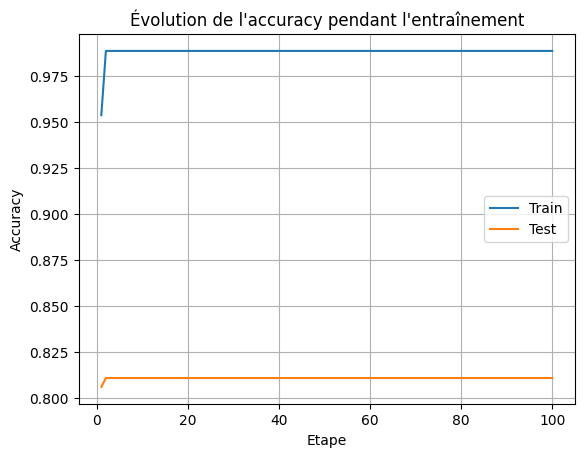

------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


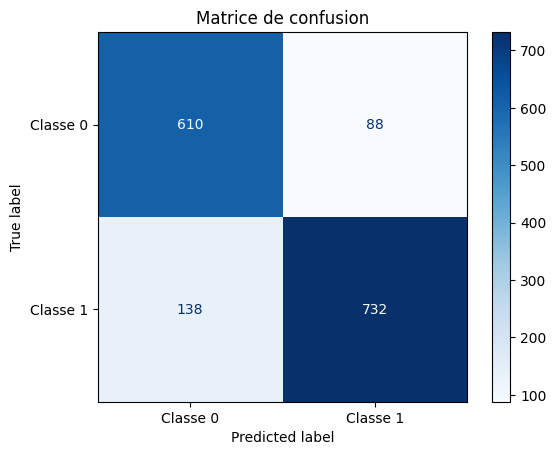

In [12]:
# ======================================================
# Classification binaire avec Perceptron - Version 1
# ======================================================
# Cette version utilise une méthode de conversion directe des données
# via la fonction df2array (non détaillée ici)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

# Sélection des deux classes à classifier
classe1 = 0
classe2 = 1

# Filtrage des données d'entraînement et de test
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en format binaire (-1/+1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Préparation des données d'entraînement et de test
X_train_bin = ut.df2array(df_binaire, index_mots)  # Conversion des features
y_train_bin = df_binaire['target_bin'].values      # Labels d'entraînement

X_test_bin = ut.df2array(df_test_bin, index_mots)  # Conversion des features
y_test_bin = df_test_bin['target_bin'].values      # Labels de test

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptron(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

# Listes pour stocker les performances
train_acc = []  # Précision sur le train set
test_acc = []   # Précision sur le test set

# Boucle d'entraînement
N = 100  # Nombre d'itérations

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train_bin, y_train_bin)
    
    # Prédictions et calcul de l'accuracy
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    # Enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())
    
end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1),train_acc, label='Train')
plt.plot(range(1,N+1),test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.title("Évolution de l'accuracy pendant l'entraînement")
plt.legend()
plt.grid(True)
plt.show()

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 9.848722219467163 secondes


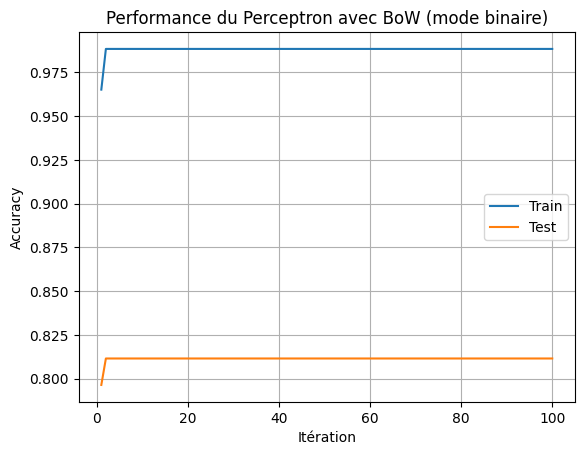

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8114803625377643
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


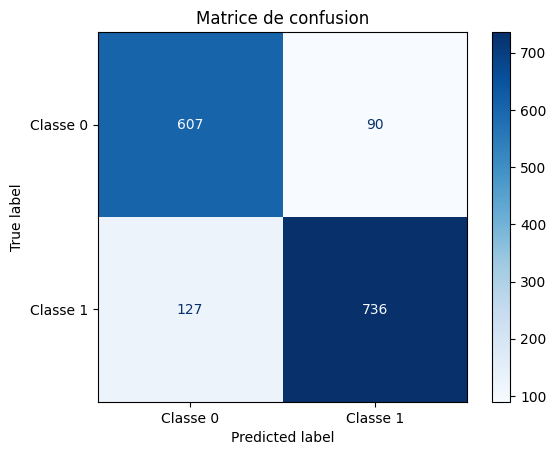

In [14]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec Perceptron - Version 2
# ======================================================
# Cette version utilise explicitement un modèle Bag-of-Words (BoW)
# pour la vectorisation des textes

# Sélection des classes (identique à la version 1)
classe1 = 0
classe2 = 1

# Filtrage des données (identique à la version 1)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels (identique à la version 1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# Entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des performances

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Performance du Perceptron avec BoW (mode binaire)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 9.631591558456421 secondes


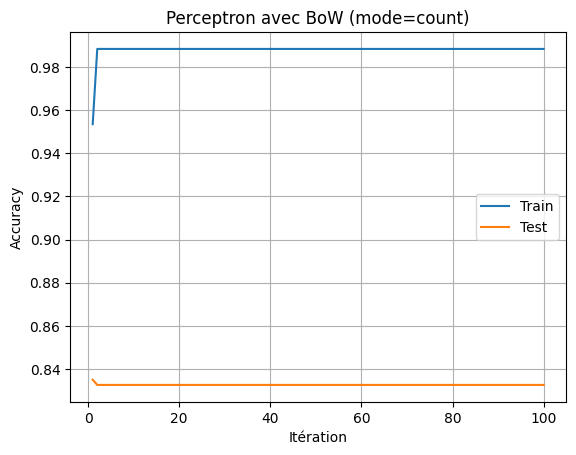

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8326283987915408
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


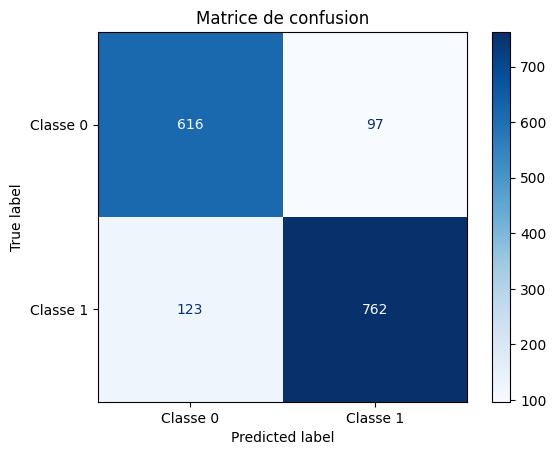

In [15]:
# =================================================================
# Classification binaire avec Comptage de mots (Bag-of-Words count) avec Perceptron - Version 3
# =================================================================
# Cette version utilise la fréquence brute des mots comme caractéristiques

# Définition des classes à classifier
classe1 = 0
classe2 = 1

# Préparation des données - Filtrage des classes sélectionnées
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Transformation des labels en format binaire (-1 pour classe1, +1 pour classe2)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode comptage
# Le mode "count" enregistre le nombre d'occurrences de chaque mot
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron avec le nombre de caractéristiques et taux d'apprentissage
perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

# Boucle d'entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des précisions

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Phase d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des précisions
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 10.051980257034302 secondes


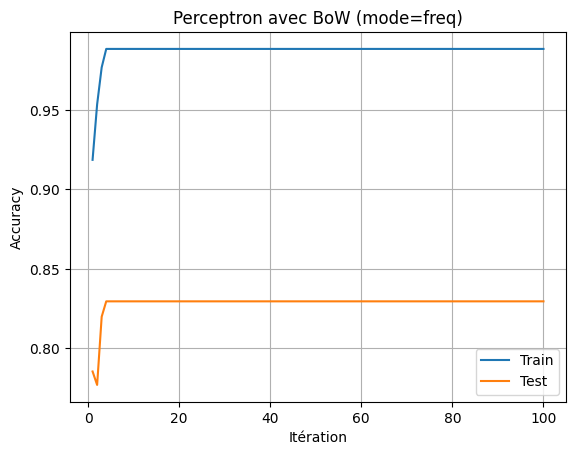

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.829607250755287
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8750
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8750
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.6250
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8750
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(0.9375), np.float64(0.875), np.float64(0.875), np.float64(0.625), np.float64(0.875)]
Taux moyen de bonne classification : 0.8375
Écart-type : 0.1090


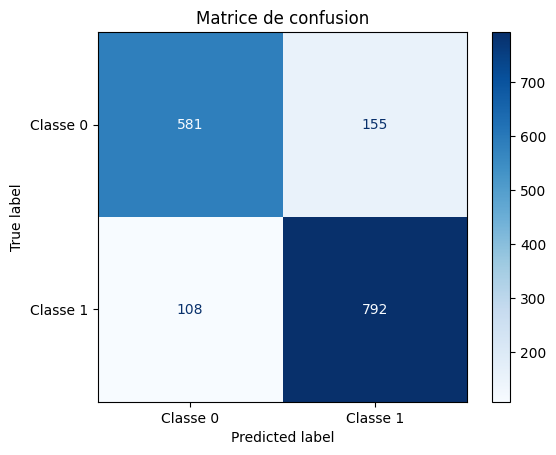

In [16]:
# =================================================================
# Classification binaire avec Fréquence relative (Bag-of-Words freq) avec Perceptron - Version 4
# =================================================================
# Cette version utilise la fréquence relative des mots comme caractéristiques

classe1 = 0
classe2 = 1

df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode fréquence
# Le mode "freq" utilise la fréquence relative (occurrences normalisées par document)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 9.776228666305542 secondes


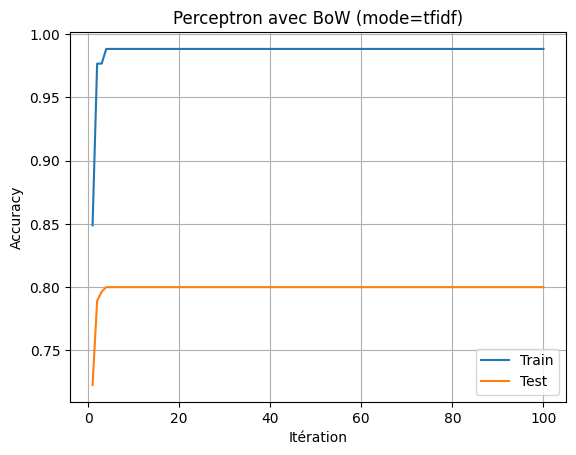

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8125
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9375), np.float64(0.9375), np.float64(0.8125), np.float64(1.0)]
Taux moyen de bonne classification : 0.9375
Écart-type : 0.0685


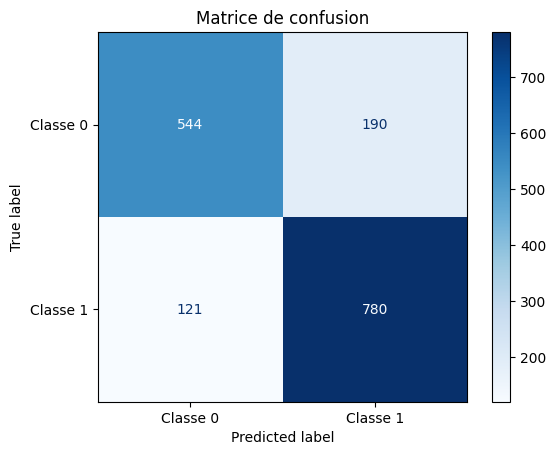

In [17]:
# =================================================================
# Classification binaire avec TF-IDF avec Perceptron - Version 5
# =================================================================
# Cette version utilise le score TF-IDF comme caractéristiques

classe1 = 0
classe2 = 1

df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle TF-IDF
# TF-IDF pondère les mots par leur importance dans le document et le corpus
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptron(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 71.88484525680542 secondes
Accuracy (multi-classe): 0.4619
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8750
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8750
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.8750
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(0.9375), np.float64(0.875), np.float64(0.875), np.float64(0.875)]
Taux moyen de bonne classification : 0.9125
Écart-type : 0.0500


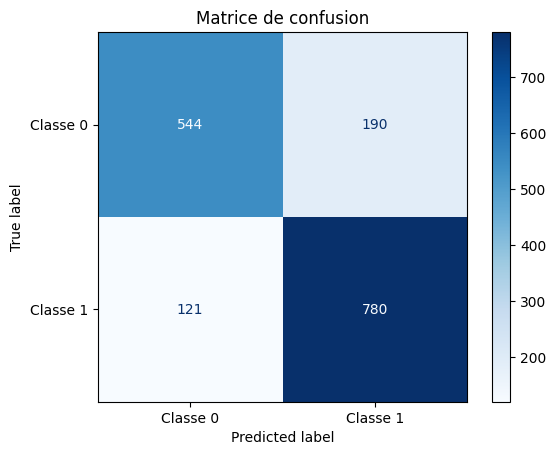

In [18]:
# =================================================================
# Classification multi-classe avec Perceptron
# =================================================================

classifiers = {}
for classe in les_targets:
    y_train_multilabel = np.where(df_train['target'] == classe, +1, -1)
    X_train_multi = ut.df2array(df_train, index_mots)

    clf = classif.ClassifierPerceptron(X_train_multi.shape[1])
    clf.train(X_train_multi, y_train_multilabel)
    classifiers[classe] = clf


X_test_multi = ut.df2array(df_test, index_mots)
y_true = df_test['target'].values

y_pred = []

# Chronométrer l'entraînement
start = time.time()
for x in X_test_multi:
    scores = {classe: clf.score(x) for classe, clf in classifiers.items()}
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

y_pred = np.array(y_pred)
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (multi-classe): {accuracy_multi:.4f}")

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

# Classifier PerceptronBiais

Temps total d'entraînement : 34.29858350753784 secondes


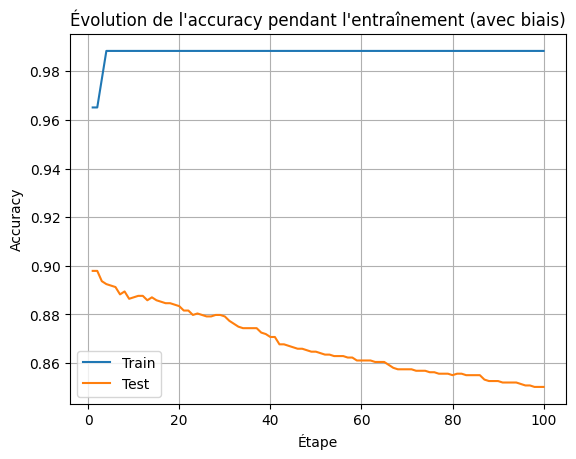

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8501510574018127
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


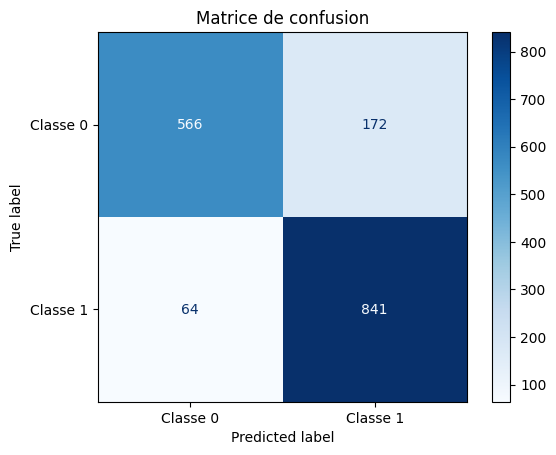

In [19]:
# ======================================================
# Classification binaire avec PerceptronBiais - Version 1
# ======================================================

# Sélection des deux classes à classifier
classe1 = 0
classe2 = 1

# Filtrage des données d'entraînement et de test
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en format binaire (-1/+1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Préparation des données d'entraînement et de test
X_train_bin = ut.df2array(df_binaire, index_mots)  # Conversion des features
y_train_bin = df_binaire['target_bin'].values      # Labels d'entraînement

X_test_bin = ut.df2array(df_test_bin, index_mots)  # Conversion des features
y_test_bin = df_test_bin['target_bin'].values      # Labels de test

# ✅ Initialisation du perceptron AVEC BIAIS
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train_bin.shape[1], learning_rate=0.01)

# Listes pour stocker les performances
train_acc = []  # Précision sur le train set
test_acc = []   # Précision sur le test set

# Boucle d'entraînement
N = 100  # Nombre d'itérations

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train_bin, y_train_bin)
    
    # Prédictions et calcul de l'accuracy
    y_train_pred = np.array([perceptron.predict(x) for x in X_train_bin])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test_bin])
    
    # Enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1, N+1), train_acc, label='Train')
plt.plot(range(1, N+1), test_acc, label='Test')  
plt.ylabel('Accuracy')
plt.xlabel("Étape")
plt.title("Évolution de l'accuracy pendant l'entraînement (avec biais)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 10.827882528305054 secondes


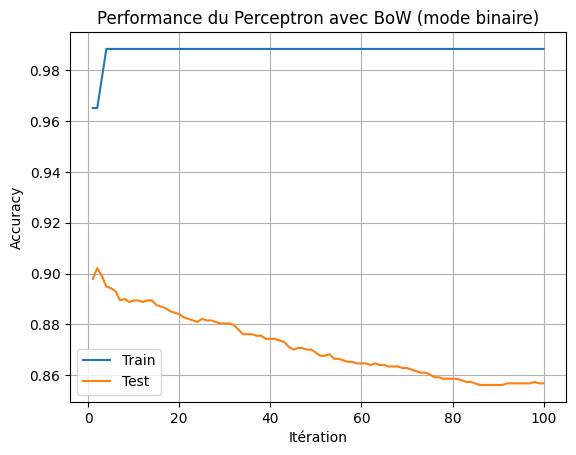

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.856797583081571
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


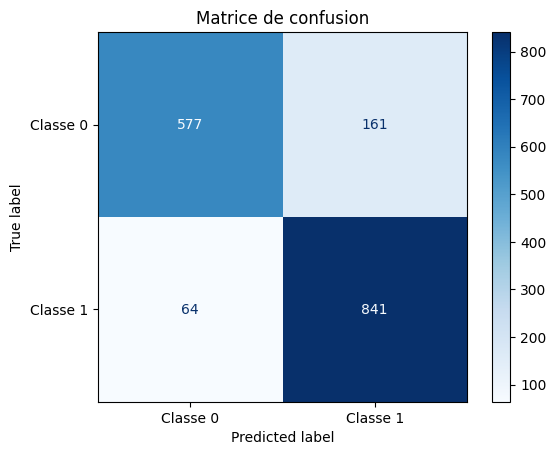

In [20]:
# ======================================================
# Classification binaire avec Bag-of-Words (Binaire) avec PerceptronBiais - Version 2
# ======================================================
# Cette version utilise explicitement un modèle Bag-of-Words (BoW)
# pour la vectorisation des textes

# Sélection des classes (identique à la version 1)
classe1 = 0
classe2 = 1

# Filtrage des données (identique à la version 1)
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels (identique à la version 1)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

# Entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des performances

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Étape d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des performances
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Performance du Perceptron avec BoW (mode binaire)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage des résultats finaux
print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 10.93728232383728 secondes


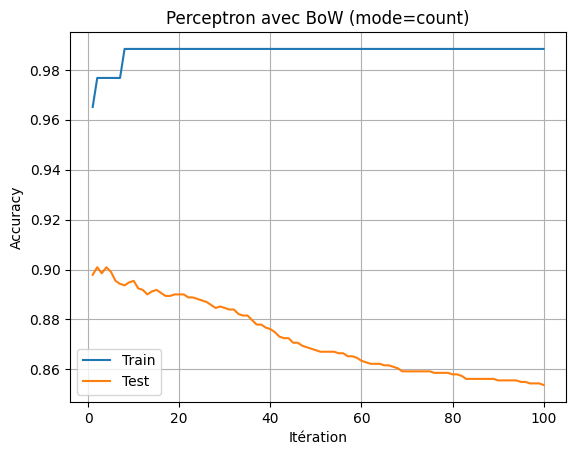

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8537764350453172
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


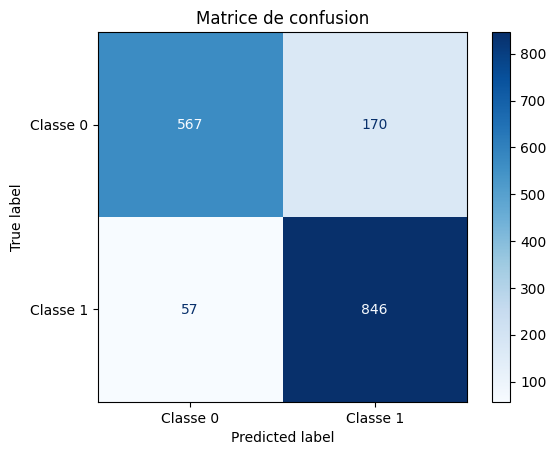

In [21]:
# =================================================================
# Classification binaire avec Comptage de mots (Bag-of-Words count) avec PerceptronBiais - Version 3
# =================================================================
# Cette version utilise la fréquence brute des mots comme caractéristiques

# Définition des classes à classifier
classe1 = 0
classe2 = 1

# Préparation des données - Filtrage des classes sélectionnées
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Transformation des labels en format binaire (-1 pour classe1, +1 pour classe2)
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode comptage
# Le mode "count" enregistre le nombre d'occurrences de chaque mot
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Initialisation du perceptron avec le nombre de caractéristiques et taux d'apprentissage
perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

# Boucle d'entraînement et évaluation
N = 100  # Nombre d'itérations
train_acc, test_acc = [], []  # Stockage des précisions

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    # Phase d'entraînement
    perceptron.train_step(X_train, y_train_bin)
    
    # Prédictions sur les ensembles d'entraînement et de test
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    # Calcul et enregistrement des précisions
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

# Visualisation des résultats
plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=count)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 12.40121078491211 secondes


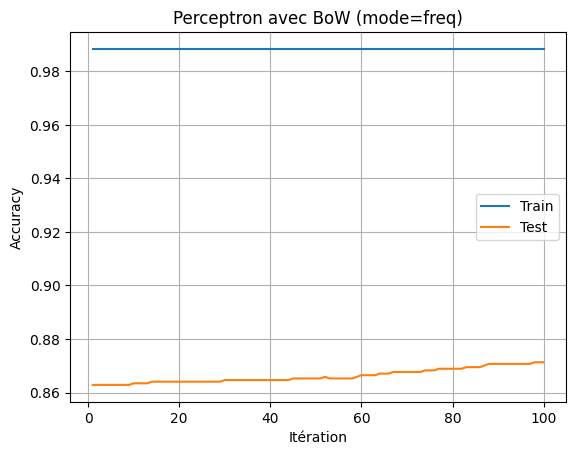

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.8712990936555891
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


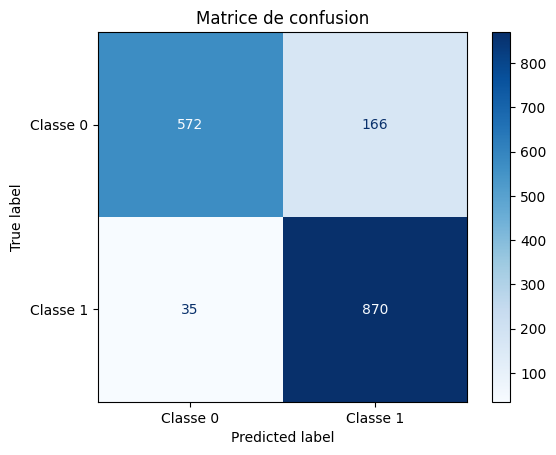

In [22]:
# =================================================================
# Classification binaire avec Fréquence relative (Bag-of-Words freq) avec PerceptronBiais - Version 4
# =================================================================
# Cette version utilise la fréquence relative des mots comme caractéristiques

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode fréquence
# Le mode "freq" utilise la fréquence relative (occurrences normalisées par document)
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=freq)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

Temps total d'entraînement : 13.00895881652832 secondes


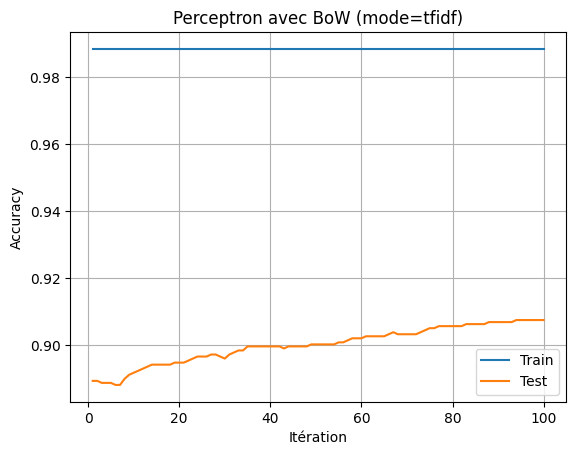

Accuracy finale (train): 0.9883720930232558
Accuracy finale (test) : 0.9075528700906345
------ affichage validation croisée (optionnel)
Itération 0: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 1: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 2: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
Itération 3: taille base app.= 70	taille base test=16	Taux de bonne classif: 0.9375
Itération 4: taille base app.= 70	taille base test=16	Taux de bonne classif: 1.0000
------ fin affichage validation croisée
Taux de bonne classification par fold : [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(0.9375), np.float64(1.0)]
Taux moyen de bonne classification : 0.9875
Écart-type : 0.0250


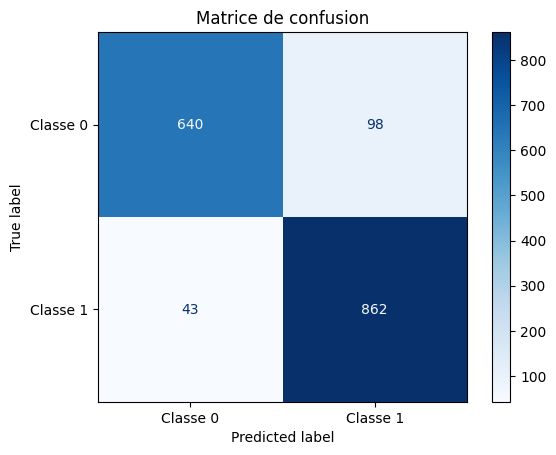

In [23]:
# =================================================================
# Classification binaire avec TF-IDF avec PerceptronBiais - Version 5
# =================================================================
# Cette version utilise le score TF-IDF comme caractéristiques

classe1 = 0
classe2 = 1
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle TF-IDF
# TF-IDF pondère les mots par leur importance dans le document et le corpus
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

perceptron = classif.ClassifierPerceptronBiais(input_dimension=X_train.shape[1], learning_rate=0.01)

N = 100
train_acc, test_acc = [], []

# Chronométrer l'entraînement
start = time.time()
for _ in range(N):
    perceptron.train_step(X_train, y_train_bin)
    
    y_train_pred = np.array([perceptron.predict(x) for x in X_train])
    y_test_pred = np.array([perceptron.predict(x) for x in X_test])
    
    train_acc.append((y_train_pred == y_train_bin).mean())
    test_acc.append((y_test_pred == y_test_bin).mean())

end = time.time()
print("Temps total d'entraînement :", end - start, "secondes")

plt.plot(range(1,N+1), train_acc, label="Train")
plt.plot(range(1,N+1), test_acc, label="Test")
plt.xlabel("Itération")
plt.ylabel("Accuracy")
plt.title("Perceptron avec BoW (mode=tfidf)")
plt.legend()
plt.grid(True)
plt.show()

print("Accuracy finale (train):", train_acc[-1])
print("Accuracy finale (test) :", test_acc[-1])

# Validation croisée 5 folds sur l’ensemble d'entraînement binaire
nb_folds = 5
perf_fold, moyenne, ecart_type = ev.validation_croisee(perceptron, (X_train_bin, y_train_bin), nb_folds)

print(f"Taux de bonne classification par fold : {perf_fold}")
print(f"Taux moyen de bonne classification : {moyenne:.4f}")
print(f"Écart-type : {ecart_type:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test_bin, y_test_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

In [14]:
# =================================================================
# Classification multi-classe avec PerceptronBiais
# =================================================================

from sklearn.decomposition import PCA

# Définition de la dimension réduite après PCA
pca_dim = 50

# Extraction de la matrice de caractéristiques du jeu d'entraînement
X_train_multi_full = ut.df2array(df_train, index_mots)

# Application du PCA sur les données d'entraînement
pca = PCA(n_components=pca_dim)
X_train_multi = pca.fit_transform(X_train_multi_full)

# Entraînement de plusieurs classifieurs Perceptron (One-vs-All)
classifiers = {}

# Chronométrer
start = time.time()
for classe in les_targets:
    y_train_multilabel = np.where(df_train['target'] == classe, +1, -1)
    clf = classif.ClassifierPerceptronBiais(pca_dim)  # Entrée de dimension réduite
    clf.train(X_train_multi, y_train_multilabel)
    classifiers[classe] = clf

# Application de la transformation PCA sur les données de test
X_test_multi_full = ut.df2array(df_test, index_mots)
X_test_multi = pca.transform(X_test_multi_full)
y_true = df_test['target'].values

# Prédiction
y_pred = []

for x in X_test_multi:
    scores = {classe: clf.score(x) for classe, clf in classifiers.items()}
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

y_pred = np.array(y_pred)
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (multi-classe avec PerceptronBiais et PCA): {accuracy_multi:.4f}")

end = time.time()
print("Temps d'exécution :", end - start, "secondes")

Accuracy (multi-classe avec PerceptronBiais et PCA): 0.1491
Temps d'exécution : 65.78755784034729 secondes


# Classifier KNN avec distance euclidienne

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance euclidienne (k = 3) - Version 1
# =================================================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance euclidienne (k = 3) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance euclidienne (k = 3) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance euclidienne (k = 3) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNN(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification multi-classe avec KNN avec distance euclidienne (approche One-vs-All)
# =================================================================
# Cette implémentation utilise la stratégie "Un contre Tous" pour 
# étendre le classifieur KNN binaire à un problème multi-classe

# Dictionnaire pour stocker les classifieurs KNN pour chaque classe
classifiers_knn = {}

# Pour chaque classe unique dans notre problème
for classe in les_targets:
    # -------------------------------------------------------------
    # Préparation des labels en One-vs-All:
    # - +1 pour la classe courante
    # - -1 pour toutes les autres classes
    y_train_multilabel = np.where(df_train['target'] == classe, +1, -1)
    
    # -------------------------------------------------------------
    # Extraction des caractéristiques (même méthode que pour le Perceptron)
    X_train_multi = ut.df2array(df_train, index_mots)
    
    # -------------------------------------------------------------
    # Initialisation et entraînement du KNN:
    # - k=3 correspond aux 3 plus proches voisins
    clf = classif.ClassifierKNN(input_dimension=X_train_multi.shape[1], k=3)
    clf.train(X_train_multi, y_train_multilabel)
    
    # Stockage du classifieur entraîné dans le dictionnaire
    classifiers_knn[classe] = clf

# -------------------------------------------------------------
# Phase de test:
# Conversion des données de test en vecteurs de caractéristiques
X_test_multi = ut.df2array(df_test, index_mots)
y_true = df_test['target'].values  # Vraies étiquettes

# -------------------------------------------------------------
# Prédiction sur l'ensemble de test:
y_pred = []
for x in X_test_multi:
    # Calcul du score pour chaque classifieur One-vs-All
    # Pour KNN, le score correspond généralement au nombre de votes +1
    scores = {classe: clf.score(x) for classe, clf in classifiers_knn.items()}
    
    # Sélection de la classe avec le score maximal
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

# Conversion des prédictions en array numpy
y_pred = np.array(y_pred)

# -------------------------------------------------------------
# Calcul et affichage de la précision globale
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (KNN multi-classe): {accuracy_multi:.4f}")

# Classifier KNN avec distance cosinus

In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Binaire) avec KNN avec distance cosinus (k = 3) - Version 1
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="binary")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="binary")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Comptage) avec KNN avec distance cosinus (k = 3) - Version 2
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="count")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="count")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words Frequence) avec KNN avec distance cosinus (k = 3) - Version 3
# =================================================================

# Sélection des classes
classe1 = 0
classe2 = 1

# Filtrage des données
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des labels en -1 / +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Extraction des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Vectorisation avec modèle Bag-of-Words en mode binaire
X_train_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_train, index_mots, mode="freq")
X_test_sparse, _ = bag_of_words_sparse_manual(texts_tokenized_test, index_mots, mode="freq")

# Conversion des matrices creuses en tableaux denses
X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification binare avec (Bag-of-Words TF-IDF) avec KNN avec distance cosinus (k = 3) - Version 4
# =================================================================

# Définition des deux classes binaires
classe1 = 0
classe2 = 1

# Filtrage du dataset pour ne garder que les classes d'intérêt
df_binaire = df_train[df_train['target'].isin([classe1, classe2])].copy()
df_test_bin = df_test[df_test['target'].isin([classe1, classe2])].copy()

# Conversion des cibles en -1 et +1
df_binaire['target_bin'] = df_binaire['target'].apply(lambda x: -1 if x == classe1 else +1)
df_test_bin['target_bin'] = df_test_bin['target'].apply(lambda x: -1 if x == classe1 else +1)

# Récupération des textes tokenisés
texts_tokenized_train = df_binaire["les_mots"].tolist()
texts_tokenized_test = df_test_bin["les_mots"].tolist()

# Transformation en représentation TF-IDF manuelle
X_train_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_train, index_mots)
X_test_sparse, _ = bag_of_words_tfidf_manual(texts_tokenized_test, index_mots)

X_train = X_train_sparse.toarray()
X_test = X_test_sparse.toarray()

# Extraction des étiquettes binaires
y_train = df_binaire["target_bin"].to_numpy()
y_test = df_test_bin["target_bin"].to_numpy()

# Initialisation du classificateur KNN
knn = classif.ClassifierKNNCosine(input_dimension=X_train.shape[1], k=3)

# Entraînement
tic = time.time()
knn.train(X_train, y_train)
toc = time.time()
print(f"Apprentissage effectué en {(toc - tic):.5f} secondes")

# Prédiction
tic = time.time()
y_pred = np.array([knn.predict(x) for x in X_test])
toc = time.time()
print(f"Prédiction sur test effectuée en {(toc - tic):.5f} secondes")

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (test) : {accuracy:.4f}")

# ==== Matrice de confusion ====
cm = confusion_matrix(y_test, y_pred, labels=[-1, +1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


In [ ]:
# =================================================================
# Classification multi-classe avec KNN avec distance cosinus (approche One-vs-All)
# =================================================================
# Cette implémentation utilise la stratégie "Un contre Tous" pour 
# étendre le classifieur KNN binaire à un problème multi-classe

# Dictionnaire pour stocker les classifieurs KNN pour chaque classe
classifiers_knnCosine = {}

# Pour chaque classe unique dans notre problème
for classe in les_targets:
    # -------------------------------------------------------------
    # Préparation des labels en One-vs-All:
    # - +1 pour la classe courante
    # - -1 pour toutes les autres classes
    y_train_multilabel = np.where(df_train['target'] == classe, +1, -1)
    
    # -------------------------------------------------------------
    # Extraction des caractéristiques (même méthode que pour le Perceptron)
    X_train_multi = ut.df2array(df_train, index_mots)
    
    # -------------------------------------------------------------
    # Initialisation et entraînement du KNN:
    # - k=3 correspond aux 3 plus proches voisins
    clf = classif.ClassifierKNNCosine(input_dimension=X_train_multi.shape[1], k=3)
    clf.train(X_train_multi, y_train_multilabel)
    
    # Stockage du classifieur entraîné dans le dictionnaire
    classifiers_knnCosine[classe] = clf

# -------------------------------------------------------------
# Phase de test:
# Conversion des données de test en vecteurs de caractéristiques
X_test_multi = ut.df2array(df_test, index_mots)
y_true = df_test['target'].values  # Vraies étiquettes

# -------------------------------------------------------------
# Prédiction sur l'ensemble de test:
y_pred = []
for x in X_test_multi:
    # Calcul du score pour chaque classifieur One-vs-All
    # Pour KNN, le score correspond généralement au nombre de votes +1
    scores = {classe: clf.score(x) for classe, clf in classifiers_knnCosine.items()}
    
    # Sélection de la classe avec le score maximal
    pred = max(scores, key=scores.get)
    y_pred.append(pred)

# Conversion des prédictions en array numpy
y_pred = np.array(y_pred)

# -------------------------------------------------------------
# Calcul et affichage de la précision globale
accuracy_multi = (y_pred == y_true).mean()
print(f"Accuracy (KNN multi-classe): {accuracy_multi:.4f}")

# Classifier Naive Bayes

In [ ]:
def afficher_frequences_par_classe(df_train, index_mots, les_targets):
    frequences = {l: [0] * len(index_mots) for l in les_targets}
    for l in les_targets:
        exemples_label_l = df_train[df_train['target'] == l]
        for _, row in exemples_label_l.iterrows():
            mots_message = set(row['les_mots'])
            for mot in mots_message:
                if mot in index_mots:
                    index = index_mots.index(mot)
                    frequences[l][index] += 1
        sum_frequencies = len(df_train)
        if sum_frequencies > 0:
            for j in range(len(frequences[l])):
                frequences[l][j] /= sum_frequencies
    return frequences

In [ ]:
frequences = afficher_frequences_par_classe(df_train, index_mots, les_targets)
# Affichage de quelques valeurs de fréquence non nulles 
print("Seuls les 10 premiers non nuls sont affichés.")        
for l in frequences:
    nb = 0
    print("Pour le target",l, ":")
    for j in range(0,len(frequences[l])):
        if frequences[l][j] != 0:
            if (nb < 10):
                print(f'\t {index_mots[j]}:\t {frequences[l][j]:0.6f}')
            nb += 1

In [ ]:
print("Frequences max:")
for i in les_targets:
    max_freq = max(frequences[i])
    index_max = np.argmax(frequences[i])
    mot_max = index_mots[index_max]
    print(f"\tpour le label {i}: {max_freq:.4f} pour le mot '{mot_max}'")

In [ ]:
for l in les_targets:
    proba = len(df_train[df_train['target'] == l]) / len(df_train)
    print(f'p({l}) = {proba:0.4f}')

In [ ]:
# Initialisation du classifieur
nb = classif.ClassifierNaiveBayesMultinomial(input_dimension=len(index_mots), alpha=1.0)

# Entraînement
nb.train(df_train, index_mots)

# Prédiction
y_test = df_test['target'].values
X_test = df_test['les_mots'].tolist()

y_pred = [nb.predict(mots) for mots in X_test]

# Évaluation
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy (Naive Bayes multinomial): {accuracy:.4f}")


In [ ]:
import graphviz as gv

# epsilon est le seuil de gain d'information (ex: 0.01) pour éviter le sur-apprentissage
epsilon = 0.01

# Construction et entraînement du modèle
clf_tree = classif.ClassifierArbreDecision(input_dimension=X_train.shape[1], epsilon=epsilon)
clf_tree.train(X_train, y_train)

# Création du graphe de visualisation
graphe_arbre_elections = gv.Digraph(format='png')
clf_tree.draw(graphe_arbre_elections)

# Affichage du graphe obtenu :
graphe_arbre_elections

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


## Tâches à réaliser

### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
